## Bike Sharing Demand

It has become the preferred mode of transport and the pastime of choice for millions of people in the coronavirus era. The interest in cycling has come from commuters keen to avoid public transport because of the increased risk of infection and furloughed workers with time on their hands seeking a simple form of recreation. Vehicle traffic also fell sharply in many cities due to lockdowns, tempting cyclists on to the roads.
The global market for Bicycles estimated at 29 Billion in the year 2020, is projected to reach a revised size of US$34 Billion by 2027.


![alt](pic2.jpg)


In this Notebook we will try to combine historical usage patterns with weather data in order to predict and forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

The Dataset provides hourly rental data spanning two years. The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. 
We'll predict the total count/demand of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

### Features:

* datetime - hourly date + timestamp  
* season -  
            1 = spring 
            2 = summer
            3 = fall
            4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather -
            1: Clear, Few clouds, Partly cloudy, Partly cloudy
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3: Light Snow, Rain + Thunderstorm + Scatter clouds, Rain + Scatter clouds
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv", parse_dates = ["datetime"])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [23]:
df.shape

(10886, 12)

In [24]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [30]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [31]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Drop casual and register as we considering weather conditionsa

In [30]:
df = df.drop(["casual", "registered"], axis = 1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [7]:
# add time paramteters to datafarame

df["year"] = df.datetime.dt.year
df["month"] = df.datetime.dt.month
df["day"] = df.datetime.dt.day
df["hour"] = df.datetime.dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [32]:
# drop datetime 
df = df.drop(["datetime"], axis = 1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [33]:
df_new = df.copy()
df_new.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


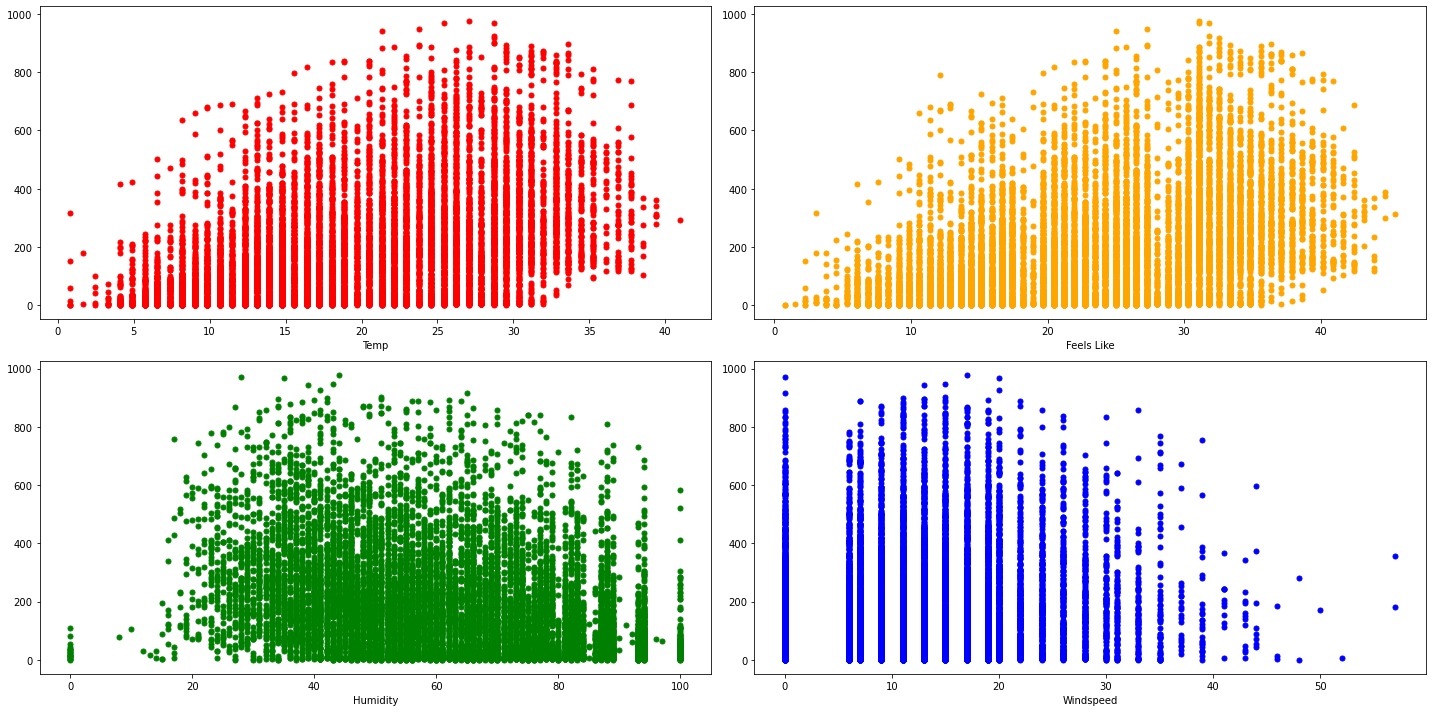

In [8]:
fig = plt.figure(figsize = (20, 10))
fig.add_subplot(221, xlabel ="Temp").scatter(df_new["temp"], df_new["count"],c="red", s=25)
fig.add_subplot(222, xlabel ="Feels Like").scatter(df_new["atemp"], df_new["count"],c="orange", s=25)
fig.add_subplot(223, xlabel ="Humidity").scatter(df_new["humidity"], df_new["count"],c="green", s=25)
fig.add_subplot(224, xlabel ="Windspeed").scatter(df_new["windspeed"], df_new["count"],c="blue", s=25)
plt.tight_layout();

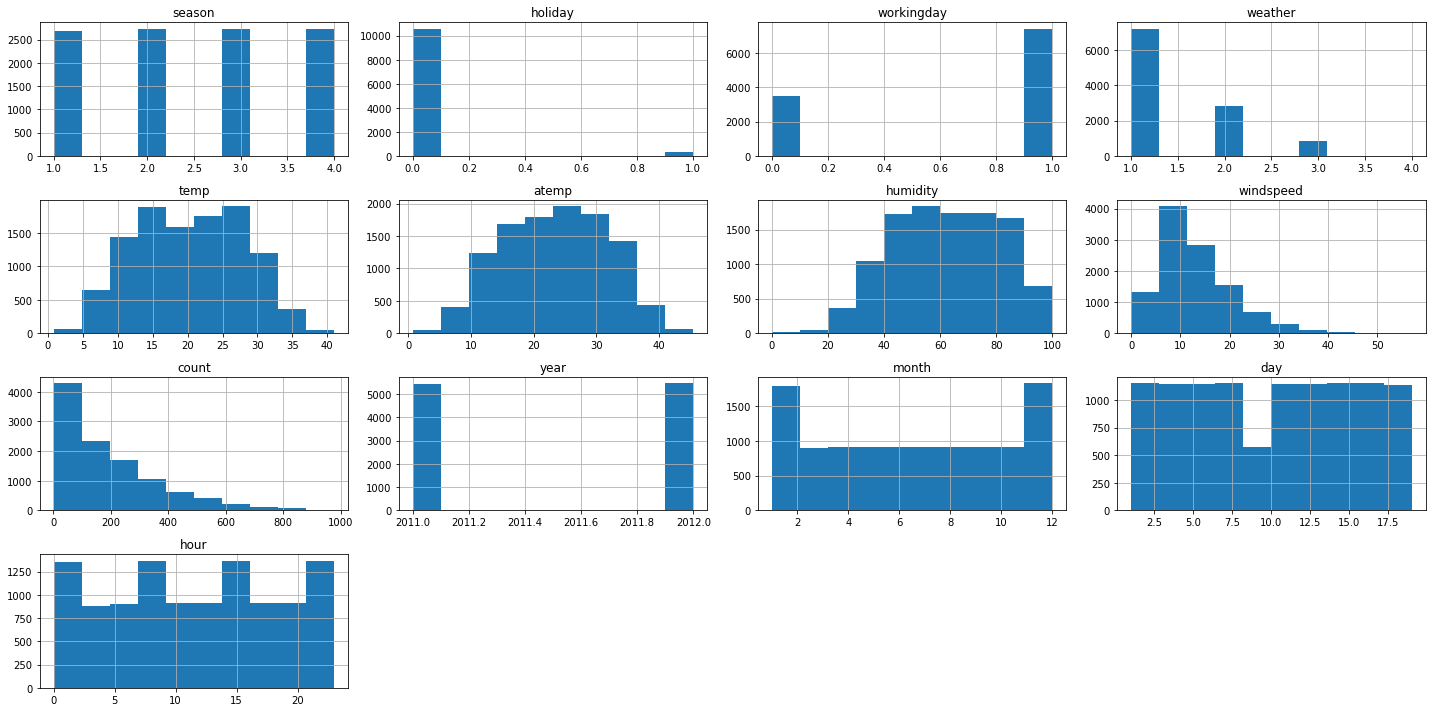

In [13]:
df_new.hist(figsize = (20, 10));

<AxesSubplot:xlabel='hour'>

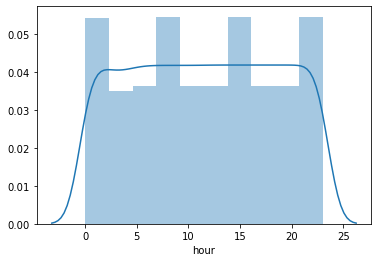

In [19]:
sns.distplot(df_new["hour"], bins=10)

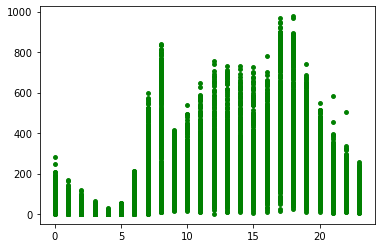

In [15]:
plt.scatter(df_new["hour"], df_new["count"], s =15, c="green");

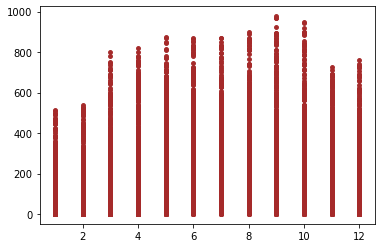

In [22]:
plt.scatter(df_new["month"], df_new["count"], s =15, c="brown");

In [132]:
df_new.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
year            int64
month           int64
day             int64
hour            int64
dtype: object

In [34]:
from sklearn.model_selection import train_test_split
np.random.seed(9)
X = df_new.drop("count", axis = 1)
y = df_new["count"]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7620, 12), (3266, 12), (7620,), (3266,))

In [36]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(9)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
model.score(X_test, y_test)

0.9423442772852282

In [38]:
y_preds = model.predict (X_test)

### Required evaluation metric is Root Mean Squared Logarithmic Error (RMSLE)

In [39]:
# Create function for evaluations
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score 
def rmsle (y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def model_score(model):
    scores = {"MAE" : mean_absolute_error(y_test, y_preds),
              "RMSLE" : rmsle(y_test, y_preds),
              "R2" : r2_score(y_test, y_preds)}
    eval = rmsle(y_test, y_preds)
    print (f"Model RMSLE = {eval:.3f}")
    return scores

In [40]:
model_score(model)

Model RMSLE = 0.348


{'MAE': 28.076680955297, 'RMSLE': 0.3481468317861984, 'R2': 0.9423442772852282}

In [41]:
df_test = pd.read_csv("test.csv", parse_dates=["datetime"])
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [42]:
# test dataset preprocessing

df_test["year"] = df_test.datetime.dt.year
df_test["month"] = df_test.datetime.dt.month
df_test["day"] = df_test.datetime.dt.day
df_test["hour"] = df_test.datetime.dt.hour
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [43]:
df_test_1 = df_test.drop("datetime", axis = 1)
df_test_1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [44]:
X_final = df_test_1

In [45]:
y_final = model.predict(X_final)

In [46]:
df_final = pd.DataFrame()

In [47]:
df_final["datetime"] = df_test["datetime"]
df_final["count"] = y_final

In [48]:
df_final.head()

,datetime,count
0,2011-01-20 00:00:00,12.07
1,2011-01-20 01:00:00,6.00
2,2011-01-20 02:00:00,3.82
3,2011-01-20 03:00:00,2.86
4,2011-01-20 04:00:00,2.56


In [50]:
df_final.to_csv("results.csv", sep = ",", index = False)

In [229]:
features_importances = model.feature_importances_
features_importances

array([0.0063651 , 0.00293539, 0.0728051 , 0.01727101, 0.06966429,
       0.04729448, 0.0329758 , 0.00975843, 0.08340784, 0.04645328,
       0.01311622, 0.59795307])

In [233]:
# Feature importances

def plot_features_importances (columns, importances, n=10):
     df = (pd.DataFrame({"Features": columns,
                        "Features Importances" : importances})
         .sort_values("Features Importances", ascending = False)
         .reset_index(drop=True))
        
     sns.barplot(x= "Features Importances",
                 y = "Features",
                 data = df[:n],
                 orient = "h");

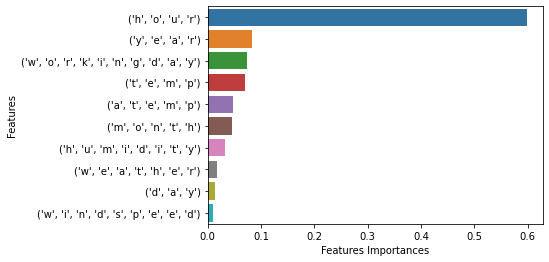

In [234]:
plot_features_importances(X_final, features_importances)

In [ ]:
# hyperparameters tuning using RandomizedSearch CV

from sklearn.model_selection import RandomizedSearchCV

rs_grid =  

